# Flipkart Review Sentiment Analysis


In [ ]:
#important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
import re

import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

nltk.download('stopwords')  #Stopword are meaningless words
from nltk.corpus import stopwords

stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv("/content/flipkart_data.csv")
data

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5


In [ ]:
data.shape

(9976, 2)

In [ ]:
data.isnull().sum()  #heck for null values

,0
review,0
rating,0


# Data Preprocessing

Stemming is a text preprocessing technique in natural language processing (NLP). Specifically, it is the process of reducing inflected form of a word to one so-called “stem,” or root form, also known as a “lemma” in linguistics.

In [ ]:
#Clean the dataset,  remove meaningless words from review column
stemmer = nltk.SnowballStemmer("english")

def clean(text):

  text = str(text).lower()
  text=re.sub('\[.*?]','',text)
  text=re.sub('http?://\S+|www\.S+','',text)    #remove url
  text=re.sub('<.*?>+','',text)
  text=re.sub('\n','',text)
  text=re.sub('\W*\d\W*','',text)      # Remove punctuation and numbers


  text = " ".join(word for word in text.
                       split() if word not in stopword)
  text =[stemmer.stem(word) for word in text.split(' ')]  #stemmer finds root word of the word
  text=" ".join(text)                                       #eg programmer, programming --> program
  return text

data['review'] = data['review'].apply(clean)
data.head()

,review,rating
0,nice produt. like design lot. easi carry. and....,5
1,awesom sound....veri pretti see nd sound quali...,5
2,awesom sound quality. proshr batteri life (inc...,4
3,think good product per qualiti also design qui...,5
4,awesom bass sound qualiti good bettari long li...,5


#EDA

In [ ]:
#As, thedata is multi-labelled,
#firstly explore those labels

# unique ratings
pd.unique(data['rating'])

array([5, 4, 1, 3, 2])

<Axes: xlabel='rating', ylabel='count'>

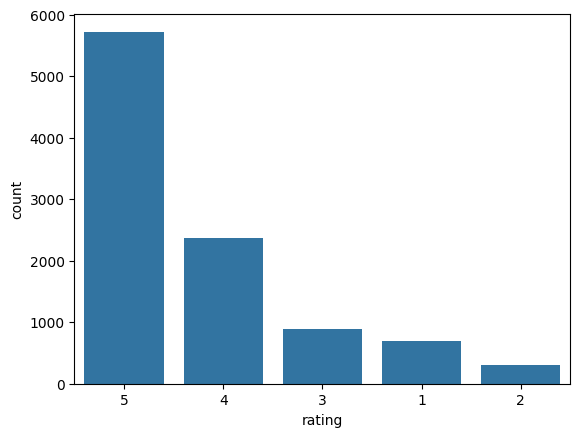

In [ ]:
#Countplot for the rating
import seaborn as sns
sns.countplot(data=data,
              x='rating',
              order=data.rating.value_counts().index)

In [ ]:
ratings = data['rating'].value_counts()
numbers=ratings.index
quantity=ratings.values

import plotly.express as px

figure=px.pie(data, values=quantity, names=numbers, hole=0.5)

figure.show()
print(ratings)

rating
5    5726
4    2365
3     884
1     691
2     310
Name: count, dtype: int64


In [ ]:
#Creating sentiments based on reviews as Analysis
#create a function to check negative, neutral and positive analysis
def getAnalysis(rating):
    if rating<3:
        return 'Negative'
    elif rating ==3:
        return 'Neutral'
    else:
        return 'Positive'

data['Analysis'] = data['rating'].apply(getAnalysis)
data


,review,rating,Analysis
0,nice produt. like design lot. easi carry. and....,5,Positive
1,awesom sound....veri pretti see nd sound quali...,5,Positive
2,awesom sound quality. proshr batteri life (inc...,4,Positive
3,think good product per qualiti also design qui...,5,Positive
4,awesom bass sound qualiti good bettari long li...,5,Positive
...,...,...,...
9971,goodread,5,Positive
9972,everyth amazimg built light..read,5,Positive
9973,goodread,5,Positive
9974,best headphon ever used....read,5,Positive


In [ ]:
# rating label(final)
pos_neg = []
for i in range(len(data['rating'])):
    if data['rating'][i] > 3:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg

data.head(20)

,review,rating,Analysis,label
0,nice produt. like design lot. easi carry. and....,5,Positive,1
1,awesom sound....veri pretti see nd sound quali...,5,Positive,1
2,awesom sound quality. proshr batteri life (inc...,4,Positive,1
3,think good product per qualiti also design qui...,5,Positive,1
4,awesom bass sound qualiti good bettari long li...,5,Positive,1
5,awsom sound power bass batteri backup also exc...,5,Positive,1
6,product sound clear excel bass. obvious good p...,4,Positive,1
7,u buy this---prossound qualiti build qualiti a...,4,Positive,1
8,"first all, want talk sound quality. sound qual...",5,Positive,1
9,good look super fine clear sound power full ba...,5,Positive,1


In [ ]:
#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
                                                    test_size=0.33,
                                                    stratify=data['label'],
                                                    random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


lr.fit(X_train,y_train)

Y_pred = lr.predict(X_test)
print(accuracy_score(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

0.8770118433039782
              precision    recall  f1-score   support

           0       0.84      0.43      0.57       622
           1       0.88      0.98      0.93      2671

    accuracy                           0.88      3293
   macro avg       0.86      0.70      0.75      3293
weighted avg       0.87      0.88      0.86      3293



<Axes: >

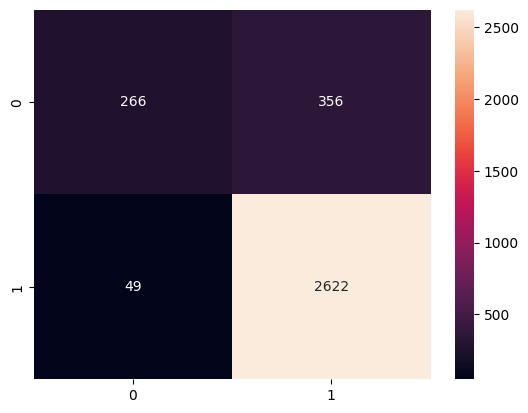

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,Y_pred), annot=True, fmt="d")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

#train the classifier on training data
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

print(accuracy_score(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

0.8879441238991801
              precision    recall  f1-score   support

           0       0.81      0.54      0.64       622
           1       0.90      0.97      0.93      2671

    accuracy                           0.89      3293
   macro avg       0.85      0.75      0.79      3293
weighted avg       0.88      0.89      0.88      3293



<Axes: >

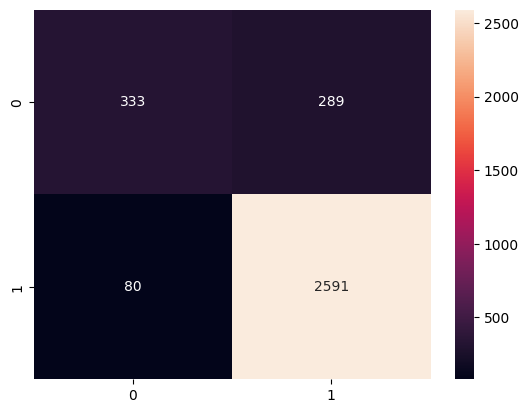

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,rf_pred), annot=True, fmt="d")

**Sentiment Labeling**

In [ ]:
nltk.download('vader_lexicon')

sentiment=SentimentIntensityAnalyzer()

#determining positive, negative, neutral based on the polarity score

data['Positive'] = [sentiment.polarity_scores(i)["pos"] for i in data['review']]
data['Negative'] = [sentiment.polarity_scores(i)["neg"] for i in data['review']]
data['Neutral'] = [sentiment.polarity_scores(i)["neu"] for i in data['review']]

#created new columns
data = data[["review","Positive","Negative","Neutral"]]
data.head(10)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review,Positive,Negative,Neutral
0,nice produt. like design lot. easi carry. and....,0.398,0.000,0.602
1,awesom sound....veri pretti see nd sound quali...,0.471,0.000,0.529
2,awesom sound quality. proshr batteri life (inc...,0.149,0.000,0.851
3,think good product per qualiti also design qui...,0.384,0.048,0.567
4,awesom bass sound qualiti good bettari long li...,0.163,0.107,0.730
5,awsom sound power bass batteri backup also exc...,0.479,0.029,0.492
6,product sound clear excel bass. obvious good p...,0.509,0.000,0.491
7,u buy this---prossound qualiti build qualiti a...,0.194,0.066,0.740
8,"first all, want talk sound quality. sound qual...",0.284,0.039,0.677
9,good look super fine clear sound power full ba...,0.691,0.000,0.309


In [ ]:
#overall sentiment score
x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])

def sentiment_score(a,b,c):
  if (a>b) and (a>c):
    print("Positive")
  elif (b>a) and (b>c):
    print("Negative")
  else:
    print("Neutral")

sentiment_score(x,y,z)

Neutral


In [ ]:
print("Positive:",x)
print("Negative:",y)
print("Neutral:",z)




Positive: 3094.410000000082
Negative: 362.0080000000005
Neutral: 6519.576999999994


In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each